In [ ]:
!pip install numpy matplotlib ipykernel

/bin/bash: /home/argentic@coria.fr/Bureau/Work/Data_DDA_benchmark_paper/.venv/bin/pip : /home/argentic@coria.fr/Bureau/Work/paper1/.venv/bin/python : mauvais interpréteur: Aucun fichier ou dossier de ce nom


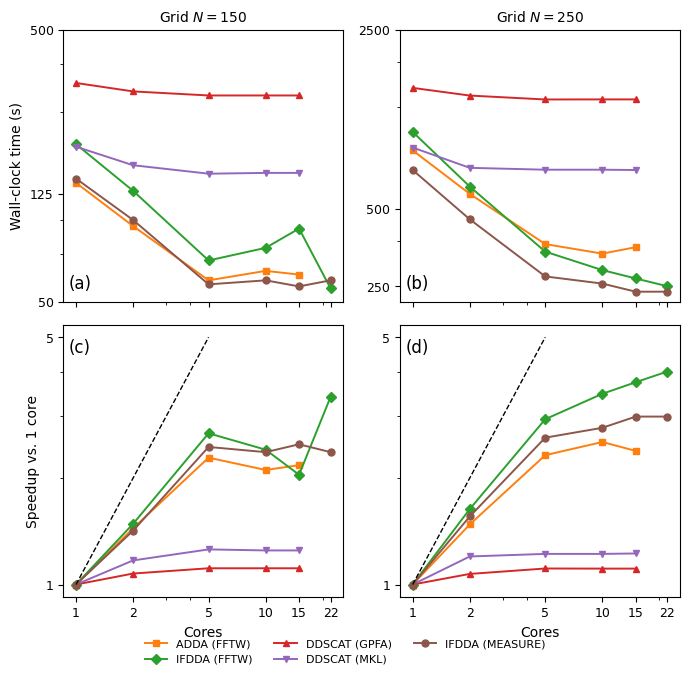

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FuncFormatter

# ---------------- Data (Left column: N=150) ----------------
cores_150 = np.array([1, 2, 5, 10, 15, 22], dtype=int)
data_150 = {
    "ADDA (FFTW)":       [137, 95, 60, 65, 63, None],
    "IFDDA (FFTW)":      [190, 128, 71, 79, 93, 56],
    "ADDA (GPFA)":     [319, 297, 287, 287, 287, None],
    "ADDA (MKL)":      [186, 159, 148, 149, 149, None],
    "IFDDA (MEASURE)":      [142, 100, 58, 60, 57, 60],
}

# ---------------- Data (Right column: N=250) ----------------
cores_250 = np.array([1, 2, 5, 10, 15, 22], dtype=int)
data_250 = {
    "ADDA (FFTW)":       [847, 573, 365, 335, 355, None],
    "IFDDA (FFTW)":      [1000, 612, 341, 289, 268, 250],
    "ADDA (GPFA)":     [1485, 1386, 1338, 1339, 1339, None],
    "ADDA (MKL)":      [869, 724, 712, 712, 710, None],
    "IFDDA (MEASURE)":      [710, 456, 273, 256, 238, 238],
}

def to_array(lst):
    return np.array([np.nan if v is None else float(v) for v in lst], dtype=float)

def speedup_from_onecore(cores, tarr):
    t1 = tarr[cores == 1]
    if np.isnan(t1).any():
        return np.full_like(tarr, np.nan)
    return t1[0] / tarr

times_150 = {k: to_array(v) for k, v in data_150.items()}
times_250 = {k: to_array(v) for k, v in data_250.items()}
speedups_150 = {k: speedup_from_onecore(cores_150, v) for k, v in times_150.items()}
speedups_250 = {k: speedup_from_onecore(cores_250, v) for k, v in times_250.items()}

# ---------------- Style ----------------
plt.rcParams.update({
    "figure.figsize": (7.0, 6.8),
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 1.4,
    "lines.markersize": 5,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

labels = ["ADDA (FFTW)", "IFDDA (FFTW)", "ADDA (GPFA)", "ADDA (MKL)", "IFDDA (MEASURE)"]
marker_map = {lab: m for lab, m in zip(labels, ["s", "D", "^", "v", "o"])}
color_map  = {lab: c for lab, c in zip(labels, ["C1", "C2", "C3", "C4", "C5"])}

fig, axes = plt.subplots(2, 2, sharex='col', sharey=False)
(ax_time_150, ax_time_250), (ax_speed_150, ax_speed_250) = axes

# ---------- (a) Wall time, N=150 ----------
for method, t in times_150.items():
    m = ~np.isnan(t)
    if np.any(m):
        ax_time_150.plot(cores_150[m], t[m],
                         marker=marker_map.get(method, "o"),
                         color=color_map.get(method, None),
                         label=method)
ax_time_150.set_ylabel("Wall-clock time (s)")
ax_time_150.set_title(r"Grid $N=150$")
ax_time_150.set_xscale('log', base=5)
ax_time_150.set_yscale('log', base=5)
ax_time_150.set_xticks(cores_150)
ax_time_150.set_yticks([50, 150, 500])
ax_time_150.set_xticklabels([str(c) for c in cores_150])
ax_time_150.yaxis.set_major_locator(FixedLocator([50, 125, 500]))
ax_time_150.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f"{y:.0f}")   # or f"{y:g}" if you prefer
)
ax_time_150.text(0.02, 0.05, "(a)", transform=ax_time_150.transAxes, fontsize=12)

# ---------- (b) Wall time, N=250 ----------
for method, t in times_250.items():
    m = ~np.isnan(t)
    if np.any(m):
        ax_time_250.plot(cores_250[m], t[m],
                         marker=marker_map.get(method, "o"),
                         color=color_map.get(method, None),
                         label=method)
ax_time_250.set_title(r"Grid $N=250$")
ax_time_250.set_xscale('log', base=5)
ax_time_250.set_yscale('log', base=5)
ax_time_250.set_xticks(cores_250)
ax_time_250.set_xticklabels([str(c) for c in cores_250])
ax_time_250.set_ylabel("")
ax_time_250.set_yticks([250, 500, 2500])
ax_time_250.yaxis.set_major_locator(FixedLocator([250, 500, 2500]))
ax_time_250.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f"{y:.0f}")
)
ax_time_250.text(0.02, 0.05, "(b)", transform=ax_time_250.transAxes, fontsize=12)

# ---------- (c) Speedup, N=150 ----------
for method, s in speedups_150.items():
    m = ~np.isnan(s)
    if np.any(m):
        ax_speed_150.plot(cores_150[m], s[m],
                          marker=marker_map.get(method, "o"),
                          color=color_map.get(method, None),
                          label=method)
ideal_150 = cores_150 / cores_150[0]
ax_speed_150.plot(cores_150[:3], ideal_150[:3], linestyle="--", linewidth=1.0,
                  color="black", label="Ideal (linear)")
ax_speed_150.set_ylabel("Speedup vs. 1 core")
ax_speed_150.set_xlabel("Cores")
ax_speed_150.set_xscale('log', base=5)
ax_speed_150.set_yscale('log', base=5)
ax_speed_150.set_xticks(cores_150)
ax_speed_150.set_xticklabels([str(c) for c in cores_150])
ax_speed_150.set_yticks([1, 5])
ax_speed_150.yaxis.set_major_locator(FixedLocator([1, 5]))
ax_speed_150.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:g}"))
ax_speed_150.text(0.02, 0.90, "(c)", transform=ax_speed_150.transAxes, fontsize=12)

# ---------- (d) Speedup, N=250 ----------
for method, s in speedups_250.items():
    m = ~np.isnan(s)
    if np.any(m):
        ax_speed_250.plot(cores_250[m], s[m],
                          marker=marker_map.get(method, "o"),
                          color=color_map.get(method, None),
                          label=method)
ideal_250 = cores_250 / cores_250[0]
ax_speed_250.plot(cores_250[:3], ideal_250[:3], linestyle="--", linewidth=1.0,
                  color="black", label="Ideal (linear)")
ax_speed_250.set_xlabel("Cores")
ax_speed_250.set_xscale('log', base=5)
ax_speed_250.set_yscale('log', base=5)
ax_speed_250.set_xticks(cores_250)
ax_speed_250.set_xticklabels([str(c) for c in cores_250])
ax_speed_250.set_ylabel("")
ax_speed_250.set_yticks([1, 5])
ax_speed_250.yaxis.set_major_locator(FixedLocator([1, 5]))
ax_speed_250.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:g}"))
ax_speed_250.text(0.02, 0.90, "(d)", transform=ax_speed_250.transAxes, fontsize=12)

# Remove x-labels on top row
ax_time_150.set_xlabel("")
ax_time_250.set_xlabel("")

# ----- Put a single legend BELOW the graphs -----
# Collect handles/labels once (they’re the same across subplots)
handles, labels = ax_time_250.get_legend_handles_labels()

# Make room at the bottom for the legend
#fig.subplots_adjust(bottom=0.17, wspace=0.18, hspace=0.35)
fig.legend(handles, labels, loc="lower center", ncol=3, frameon=False, bbox_to_anchor=(0.5, 0.0))
fig.tight_layout(rect=(0, 0.03, 1, 1))
# Save
fig.savefig("Figure2.pdf", bbox_inches="tight", dpi=300)
fig.savefig("Figure2.svg", bbox_inches="tight", dpi=300)


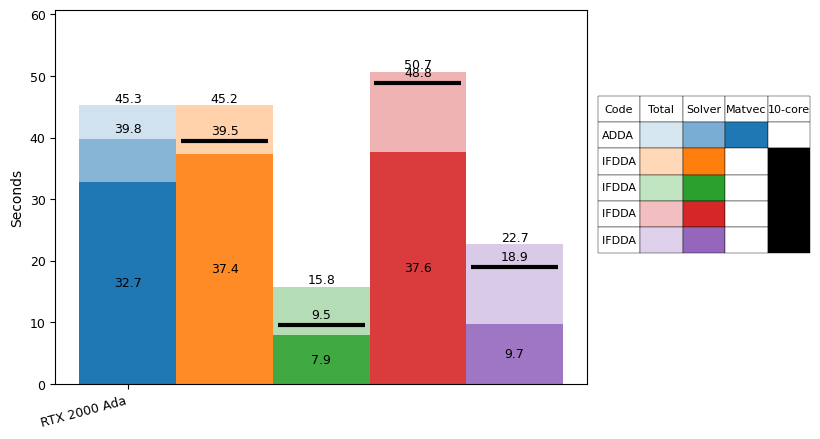

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgb

def darken_color(color, factor=0.7):
    """Return a darker shade of the given matplotlib color."""
    r, g, b = to_rgb(color)
    return (r * factor, g * factor, b * factor)

def lighten_color(color, factor=0.7):
    """Return a lighter shade of the given matplotlib color (mix with white)."""
    r, g, b = to_rgb(color)
    return (1 - factor) + factor * r, (1 - factor) + factor * g, (1 - factor) + factor * b

def grouped_stacked_bars_with_overlay_ax(
    ax, title, x_labels,
    solver_series, total_series,
    overlay_total_series=None,      # e.g., {"IFDDA DP": [...], "IFDDA SP": [...]}
    matvec_series=None,             # e.g., {"ADDA": [...]}
    code_colors=None,               # dict: series_name -> base solver color
    ylabel="Seconds",
    solver_alpha=0.9,
    overhead_alpha=0.35,
    annotate_fontsize=9,
    overlay_offset=0.6,
):
    """
    Draw on a provided Axes `ax`:
      - grouped bars per code (1 group here: RTX 2000 Ada)
      - if no matvec:
          bottom segment: solver (1-core)
          top segment: overhead = total - solver
      - if matvec provided for a code:
          bottom: matvec
          mid   : solver - matvec
          top   : overhead = total - solver
      - overlay: thick black bar for 10-core total
      - numbers on TOTAL, solver, matvec, and 10-core overlay

    Returns:
      solver_colors: dict code -> color used for solver segment
      total_colors:  dict code -> color representing "total bar" (lighter)
    """
    series_names = list(solver_series.keys())
    assert set(series_names) == set(total_series.keys()), "Solver/Total keys must match."
    n_series = len(series_names)
    n_groups = len(x_labels)

    for s in series_names:
        assert len(solver_series[s]) == n_groups
        assert len(total_series[s]) == n_groups
        if matvec_series and s in matvec_series:
            assert len(matvec_series[s]) == n_groups

    if overlay_total_series:
        for s, arr in overlay_total_series.items():
            assert s in series_names, f"Overlay key {s} must match a base series key"
            assert len(arr) == n_groups, f"Overlay series length mismatch for {s}"

    # If no code_colors provided, generate from default color cycle
    if code_colors is None:
        default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        code_colors = {name: default_colors[i % len(default_colors)]
                       for i, name in enumerate(series_names)}

    x = np.arange(n_groups)
    width = 0.8 / max(1, n_series)
    bar_positions = {}

    solver_colors = {}  # what we truly use for solver chunk
    total_colors  = {}  # a lighter variant to symbolize total bar

    # Draw stacked bars for each code
    for i, s in enumerate(series_names):
        base_color = code_colors[s]      # base / intended solver hue
        sol = np.array(solver_series[s], dtype=float)
        tot = np.array(total_series[s], dtype=float)
        over = np.maximum(tot - sol, 0.0)

        has_matvec = matvec_series is not None and s in matvec_series
        if has_matvec:
            mv = np.array(matvec_series[s], dtype=float)
            mv = np.minimum(mv, sol)                # safety: matvec <= solver
            sol_rest = np.maximum(sol - mv, 0.0)
        else:
            mv = None
            sol_rest = sol.copy()

        x_off = x + i*width - 0.4 + (width*n_series)/2
        bar_positions[s] = x_off

        # ---- Draw segments & decide solver/total colors ----
        if has_matvec and s == "ADDA":
            # ADDA special color scheme:
            matvec_color = "#1f77b4"                          # strong blue
            solver_color = lighten_color(matvec_color, 0.6)   # lighter for solver

            # matvec part
            ax.bar(x_off, mv, width, color=matvec_color, alpha=1.0)

            # solver rest
            ax.bar(x_off, sol_rest, width, bottom=mv,
                   color=solver_color, alpha=solver_alpha)

            bar_base_color = solver_color
            solver_colors[s] = solver_color
        else:
            # other codes: entire solver is base color
            ax.bar(x_off, sol, width, color=base_color, alpha=solver_alpha)
            bar_base_color = base_color
            solver_colors[s] = base_color

        # overhead (same hue, more transparent)
        ax.bar(x_off, over, width, bottom=sol,
               color=bar_base_color, alpha=overhead_alpha)

        # define a lighter "total" color for the legend
        total_colors[s] = lighten_color(bar_base_color, 0.3)

        # ---- Annotations ----
        # Total time on top
        for xi, si, oi, ti in zip(x_off, sol, over, tot):
            if ti > 0:
                ax.text(xi, si + oi, f"{ti:.1f}",
                        ha='center', va='bottom',
                        fontsize=annotate_fontsize)

        # Solver time:
        for xi, si in zip(x_off, sol):
            if si > 0:
                if s == 'ADDA':
                    ax.text(xi, si + 0.5, f"{si:.1f}",
                            ha='center', va='bottom',
                            fontsize=annotate_fontsize)
                else:
                    ax.text(xi, si/2, f"{si:.1f}",
                            ha='center', va='center',
                            fontsize=annotate_fontsize)

        # Matvec value in the middle of the matvec bar (if present)
        if has_matvec:
            for xi, mvi in zip(x_off, mv):
                if mvi > 0:
                    ax.text(xi, mvi/2, f"{mvi:.1f}",
                            ha='center', va='center',
                            fontsize=annotate_fontsize, color="black")

    # ---- Overlay: 10-core totals as thick black bar on top ----
    if overlay_total_series:
        for s, arr in overlay_total_series.items():
            x_off = bar_positions[s]
            for xi, yi in zip(x_off, arr):
                ax.hlines(yi, xi - width*0.45, xi + width*0.45,
                          linewidth=3.0, color='black')
                ax.text(xi, yi + overlay_offset, f"{yi:.1f}",
                        ha='center', va='bottom',
                        fontsize=annotate_fontsize)

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=15, ha='right')
    ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title, pad=6)

    return solver_colors, total_colors


def main():
    # ---------------- Data ----------------
    x_labels_150 = ['RTX 2000 Ada']

    # 1-core solver times
    solver_150 = {
        'ADDA':              [39.8],
        'IFDDA DP':          [37.4],
        'IFDDA SP':          [7.9],
        'IFDDA DP MEASURE':  [37.6],
        'IFDDA SP MEASURE':  [9.7],
    }

    # 1-core total wall-times
    total_150 = {
        'ADDA':              [45.3],
        'IFDDA DP':          [45.2],
        'IFDDA SP':          [15.8],
        'IFDDA DP MEASURE':  [50.7],
        'IFDDA SP MEASURE':  [22.7],
    }

    # matvec part of solver (only for ADDA, 1-core)
    matvec_150 = {
        'ADDA': [32.7],
    }

    # 10-core totals (overlay as black bars)
    overlay_150 = {
        'IFDDA DP':          [39.5],
        'IFDDA SP':          [9.5],
        'IFDDA DP MEASURE':  [48.8],
        'IFDDA SP MEASURE':  [18.9],
    }

    # Base solver colors per code (before ADDA special handling)
    code_colors = {
        'ADDA':             '#5fa8ff',
        'IFDDA DP':         '#ff7f0e',
        'IFDDA SP':         '#2ca02c',
        'IFDDA DP MEASURE': '#d62728',
        'IFDDA SP MEASURE': '#9467bd',
    }

    # ---------------- Figure ----------------
    fig, ax_top = plt.subplots(figsize=(9.0, 4.5))

    solver_colors, total_colors = grouped_stacked_bars_with_overlay_ax(
        ax=ax_top,
        title="",
        x_labels=x_labels_150,
        solver_series=solver_150,
        total_series=total_150,
        overlay_total_series=overlay_150,
        matvec_series=matvec_150,
        code_colors=code_colors,
        ylabel="Seconds",
        annotate_fontsize=9,
        overlay_offset=0.6,
    )

    # Adjust y-limit a bit for top labels + 10-core bars
    ymax = max(max(v) for v in total_150.values())
    if overlay_150:
        ymax = max(ymax, max(v[0] for v in overlay_150.values()))
    ax_top.set_ylim(0, ymax + 10)

    # ---------------- Compact table-style legend ----------------
    codes = list(solver_150.keys())

    col_labels = ["Code", "Total", "Solver", "Matvec", "10-core"]
    cell_text = [["" for _ in col_labels] for _ in codes]

    table = ax_top.table(
        cellText=cell_text,
        colLabels=col_labels,
        cellLoc="center",
        loc="upper right",
        bbox=[1.02, 0.35, 0.40, 0.42],  # x0, y0, w, h
    )

    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(0.65, 0.55)

    # Header style
    for j in range(len(col_labels)):
        cell = table[(0, j)]
        cell.set_text_props()

    # Fill rows with code name + real colors
    for i, code in enumerate(codes, start=1):
        # Code name
        table[(i, 0)].set_text_props(text=code, ha="left")

        # Total color (lighter, representing full bar)
        table[(i, 1)].set_facecolor(total_colors[code])

        # Solver color (what solver chunk really uses)
        table[(i, 2)].set_facecolor(solver_colors[code])

        # Matvec only for ADDA
        if code == "ADDA":
            mv_color = "#1f77b4"
            table[(i, 3)].set_facecolor(mv_color)
        else:
            table[(i, 3)].set_facecolor("white")

        # 10-core overlay (black) if exists
        if code in overlay_150:
            table[(i, 4)].set_facecolor("black")
        else:
            table[(i, 4)].set_facecolor("white")

    # Thin grid lines
    for key, cell in table.get_celld().items():
        cell.set_linewidth(0.3)

    plt.tight_layout()
    plt.savefig("Figure3.pdf", dpi=300, bbox_inches="tight")
    # plt.show()


if __name__ == "__main__":
    main()


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ---------------------------------------------------------------------
# Config
# ---------------------------------------------------------------------
CSV_PATH = "logs_GPU/ifdda_gpu_results.csv"           # <-- your raw CSV
SORTED_CSV_PATH = "ifdda_gpu_results_sorted.csv"
OUT_DIR = "fig_ifdda_gpu_pairs"
os.makedirs(OUT_DIR, exist_ok=True)

# Custom exe order you want
EXE_ORDER = [
    "ifdda_GPU",
    "ifdda_GPU_measure",
    "ifdda_GPU_single",
    "ifdda_GPU_single_measure",
]

# ---------------------------------------------------------------------
# 1. Load + clean + sort in your desired order
# ---------------------------------------------------------------------
df = pd.read_csv(CSV_PATH)

# Make sure OMP and rep are ints
df["OMP"] = df["OMP"].astype(int)
df["rep"] = df["rep"].astype(int)

# Clean numeric columns (strip spaces, convert to float)
num_cols = [
    "first_residual",
    "last_residual",
    "Cext",
    "num_iterations",
    "num_matvec",
    "total_time",
    "solver_time",
]
for col in num_cols:
    df[col] = df[col].astype(str).str.strip().astype(float)

# Custom categorical order for exe
df["exe_cat"] = pd.Categorical(df["exe"], EXE_ORDER, ordered=True)

# Sort: exe (custom) -> OMP -> rep
df_sorted = df.sort_values(by=["exe_cat", "OMP", "rep"])

# Drop helper column and save sorted CSV
df_sorted = df_sorted.drop(columns=["exe_cat"])
df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

# ---------------------------------------------------------------------
# 2. Plot pairs of executables on same figure
# ---------------------------------------------------------------------
def plot_pair_exes(df_all, exes_pair, out_name_prefix):
    """
    exes_pair: list/tuple of 2 exe names, e.g. ["ifdda_GPU", "ifdda_GPU_measure"]

    Creates one figure with:
      - top: total_time vs OMP (2 boxes per OMP, one per exe)
      - bottom: solver_time vs OMP
    """
    assert len(exes_pair) == 2, "This function expects exactly two executables."

    # Filter to just these executables
    df_pair = df_all[df_all["exe"].isin(exes_pair)].copy()
    if df_pair.empty:
        print(f"WARNING: no rows for exes={exes_pair}, skipping.")
        return

    # Get sorted list of OMP values present in this pair
    omp_values = sorted(df_pair["OMP"].unique())

    # Color mapping for the two exes
    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    exe_to_color = {
        exes_pair[0]: color_cycle[0],
        exes_pair[1]: color_cycle[1],
    }

    # Prepare positions: for each OMP, we place two boxes side-by-side
    # Base positions: 1, 2, 3, ...
    base_positions = np.arange(1, len(omp_values) + 1)
    width = 0.35  # each box width
    offset = 0.18 # shift left/right around base position

    # For each metric we want two axes (total_time, solver_time)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

    # ---------------- total_time ----------------
    for i, exe_name in enumerate(exes_pair):
        color = exe_to_color[exe_name]
        # shift negative for first exe, positive for second
        shift = -offset if i == 0 else offset

        data_total = []
        pos_total = []
        for base_pos, omp in zip(base_positions, omp_values):
            sub = df_pair[(df_pair["exe"] == exe_name) & (df_pair["OMP"] == omp)]
            vals = sub["total_time"].values
            if len(vals) == 0:
                continue
            data_total.append(vals)
            pos_total.append(base_pos + shift)

        if not data_total:
            continue

        bp = ax1.boxplot(
            data_total,
            positions=pos_total,
            widths=width,
            patch_artist=True,
            showmeans=True,
            meanline=True,
        )
        for box in bp["boxes"]:
            box.set_facecolor(color)
            box.set_alpha(0.5)
        # set color of medians & means for clarity
        for med in bp["medians"]:
            med.set_color(color)
        for meanline in bp["means"]:
            meanline.set_color(color)

    ax1.set_ylabel("total_time (s)")
    title_exes = " vs ".join(exes_pair)
    ax1.set_title(f"{title_exes}: total_time & solver_time vs OMP")

    # ---------------- solver_time ----------------
    for i, exe_name in enumerate(exes_pair):
        color = exe_to_color[exe_name]
        shift = -offset if i == 0 else offset

        data_solver = []
        pos_solver = []
        for base_pos, omp in zip(base_positions, omp_values):
            sub = df_pair[(df_pair["exe"] == exe_name) & (df_pair["OMP"] == omp)]
            vals = sub["solver_time"].values
            if len(vals) == 0:
                continue
            data_solver.append(vals)
            pos_solver.append(base_pos + shift)

        if not data_solver:
            continue

        bp = ax2.boxplot(
            data_solver,
            positions=pos_solver,
            widths=width,
            patch_artist=True,
            showmeans=True,
            meanline=True,
        )
        for box in bp["boxes"]:
            box.set_facecolor(color)
            box.set_alpha(0.5)
        for med in bp["medians"]:
            med.set_color(color)
        for meanline in bp["means"]:
            meanline.set_color(color)

    ax2.set_ylabel("solver_time (s)")
    ax2.set_xticks(base_positions)
    ax2.set_xticklabels([f"OMP={omp}" for omp in omp_values])

    # Legend: one color per exe
    handles = [
        plt.Line2D([0], [0], color=exe_to_color[exes_pair[0]], lw=6, alpha=0.7, label=exes_pair[0]),
        plt.Line2D([0], [0], color=exe_to_color[exes_pair[1]], lw=6, alpha=0.7, label=exes_pair[1]),
    ]
    ax1.legend(handles=handles, loc="upper right", frameon=False)

    plt.tight_layout()
    out_path = os.path.join(OUT_DIR, f"{out_name_prefix}_OMP_boxplots.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close(fig)
    print(f"Figure saved: {out_path}")


# ---------------------------------------------------------------------
# 3. Generate the two merged figures
# ---------------------------------------------------------------------

# 1) Normal GPU vs measured GPU
plot_pair_exes(
    df_sorted,
    exes_pair=["ifdda_GPU", "ifdda_GPU_measure"],
    out_name_prefix="ifdda_GPU_and_ifdda_GPU_measure",
)

# 2) Single vs single_measure
plot_pair_exes(
    df_sorted,
    exes_pair=["ifdda_GPU_single", "ifdda_GPU_single_measure"],
    out_name_prefix="ifdda_GPU_single_and_ifdda_GPU_single_measure",
)


Sorted CSV written to: ifdda_gpu_results_sorted.csv
Figure saved: fig_ifdda_gpu_pairs/ifdda_GPU_and_ifdda_GPU_measure_OMP_boxplots.png
Figure saved: fig_ifdda_gpu_pairs/ifdda_GPU_single_and_ifdda_GPU_single_measure_OMP_boxplots.png


## Sort laptop's MPI results

In [21]:
import pandas as pd

CSV_PATH = "logs_GPU_2000Ada/adda_gpu_results.csv"
SORTED_CSV_PATH = "logs_GPU_2000Ada/adda_gpu_results_sorted.csv"

df = pd.read_csv(CSV_PATH)

# Sort: N -> solver -> exe (custom) -> rep
df_sorted = df.sort_values(by=["N", "solver", "exe", "rep"])

df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

Sorted CSV written to: logs_GPU_2000Ada/adda_gpu_results_sorted.csv


In [ ]:
import pandas as pd

CSV_PATH = "logs/adda_results.csv"
SORTED_CSV_PATH = "logs/adda_results_sorted.csv"


df = pd.read_csv(CSV_PATH)


# Sort: N -> OMP -> exe (custom) -> rep
df_sorted = df.sort_values(by=["N", "NP", "FFT", "rep"])

# Drop helper column and save sorted CSV
df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

Sorted CSV written to: logs/adda_results_sorted_second.csv


In [ ]:
import pandas as pd

CSV_PATH = "logs/ddscat_results.csv"
SORTED_CSV_PATH = "logs/ddscat_results_sorted.csv"


df = pd.read_csv(CSV_PATH)


# Sort: N -> OMP -> exe (custom) -> rep
df_sorted = df.sort_values(by=["N", "OMP", "FFT", "rep"])

# Drop helper column and save sorted CSV
df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

Sorted CSV written to: logs/ddscat_results_sorted_second.csv


## PLot MPI laptop with variability

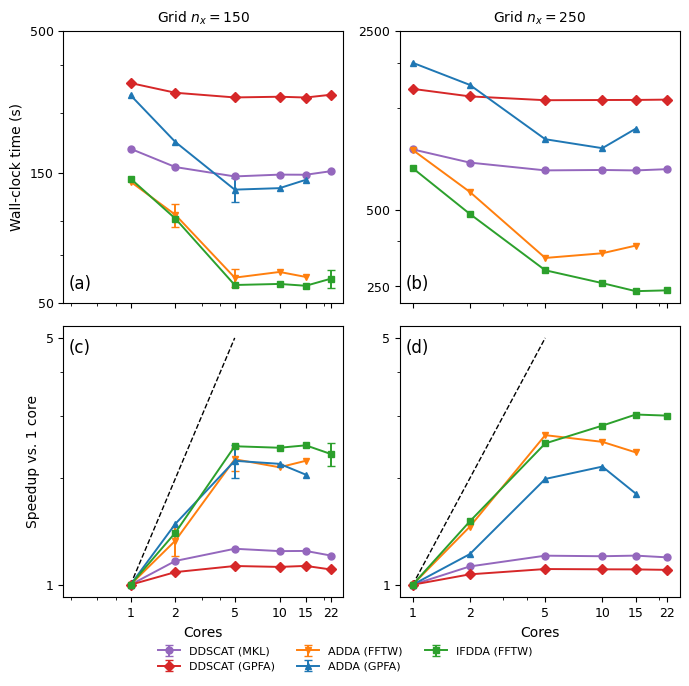

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FuncFormatter

# ============================================================
# 1. Fichiers d'entrée
# ============================================================
ddscat_file = "logs/ddscat_results_sorted.csv"
adda_file   = "logs/adda_results_sorted.csv"
ifdda_file  = "logs/ifdda_results_sorted.csv"

# ============================================================
# 2. Paramètres généraux
# ============================================================
# Grilles
Ns = [150, 250]

# Ensemble de nombres de cœurs standard (on met tout, même si certains codes n'ont pas tous les points)
cores = np.array([1, 2, 5, 10, 15, 22], dtype=int)

# Noms canoniques pour les courbes
method_labels = [
    "DDSCAT (MKL)",
    "DDSCAT (GPFA)",
    "ADDA (FFTW)",
    "ADDA (GPFA)",
    "IFDDA (FFTW)",
    "IFDDA (MEASURE)",
]

marker_map = {
    "DDSCAT (MKL)"    : "o",
    "DDSCAT (GPFA)"    : "D",
    "ADDA (FFTW)"    : "v",
    "ADDA (GPFA)"    : "^",
    "IFDDA (FFTW)"     : "s",
    "IFDDA (MEASURE)"  : "o",
}

color_map  = {
    "DDSCAT (MKL)"    : "C4",
    "DDSCAT (GPFA)"    : "C3",
    "ADDA (FFTW)"    : "C1",
    "ADDA (GPFA)"    : "C0",
    "IFDDA (FFTW)"     : "C2",
    "IFDDA (MEASURE)"  : "C5",
}

# ============================================================
# 3. Lecture des fichiers et agrégation des répétitions
# ============================================================

# Dictionnaire : (method_label, N, cores) -> liste de temps (s)
times_dict = {}

def add_sample(method, N, ncores, t):
    key = (method, int(N), int(ncores))
    times_dict.setdefault(key, []).append(float(t))


# ---------- 3.1 DDSCAT ----------
# Colonnes: N,OMP,FFT,rep,first_residual,last_residual,Cext,Qext,elapsed_time,
#          total_iterations,total_matvec,total_wall_time,solver_time,fft_time
dd = pd.read_csv(ddscat_file)

for _, row in dd.iterrows():
    N  = row["N"]
    np_cores = row["OMP"]      # nombre de processus MPI = "cores" pour cette figure
    fft = row["FFT"]
    total_wall_time = row["elapsed_seconds"]  # déjà en secondes

    if fft == "FFTMKL":
        method = "DDSCAT (MKL)"
    elif fft == "GPFAFT":
        method = "DDSCAT (GPFA)"
    else:
        continue  # au cas où

    add_sample(method, N, np_cores, total_wall_time)


# ---------- 3.2 ADDA ----------
# Colonnes: N,FFT,NP,rep,first_residual,last_residual,Qext,
#           elapsed_time,elapsed_seconds,num_iterations
ad = pd.read_csv(adda_file)

for _, row in ad.iterrows():
    N       = row["N"]
    omp     = row["NP"]   # "cores"
    fft     = row["FFT"]
    tsec    = row["total_wall_time"]

    if fft == "FFTW":
        method = "ADDA (FFTW)"
    elif fft == "GPFA":
        method = "ADDA (GPFA)"
    else:
        continue

    add_sample(method, N, omp, tsec)


# ---------- 3.3 IFDDA ----------
# Colonnes: N,OMP,EXE,rep,first_residual,last_residual,Cext,
#           elapsed_time,num_iterations,num_matvec,total_time,solver_time
idf = pd.read_csv(ifdda_file)

for _, row in idf.iterrows():
    N       = row["N"]
    omp     = row["OMP"]
    exe     = row["EXE"]
    tsec    = row["total_time"]  # temps total en secondes

    if exe == "ifdda_measure":
        method = "IFDDA (FFTW)"
    #elif exe == "ifdda_measure":
    #    method = "IFDDA (MEASURE)"
    else:
        continue

    add_sample(method, N, omp, tsec)


# ============================================================
# 4. Construction des tableaux moyens + écarts-types
# ============================================================

def build_time_and_speedup_arrays(N, method, cores_all):
    """
    Pour un couple (N, method), renvoie :
      - times_mean : tableau des temps moyens sur cores_all (np.nan si absent)
      - times_std  : tableau des σ (0 si une seule répétition, np.nan si absent)
      - speed_mean : speedup moyen (t1_mean / t) pour chaque cores_all
      - speed_std  : σ des speedups (si plusieurs répétitions)
    """
    times_mean = np.full_like(cores_all, np.nan, dtype=float)
    times_std  = np.full_like(cores_all, np.nan, dtype=float)

    # Récupère les samples à 1 core pour la référence du speedup
    key_1 = (method, N, 1)
    t1_samples = np.array(times_dict.get(key_1, []), dtype=float)

    if t1_samples.size == 0 or not np.isfinite(t1_samples).all():
        t1_mean = np.nan
    else:
        t1_mean = t1_samples.mean()

    speed_mean = np.full_like(cores_all, np.nan, dtype=float)
    speed_std  = np.full_like(cores_all, np.nan, dtype=float)

    for i, c in enumerate(cores_all):
        key = (method, N, int(c))
        samples = np.array(times_dict.get(key, []), dtype=float)

        if samples.size == 0:
            continue  # reste NaN

        # Temps
        times_mean[i] = samples.mean()
        times_std[i]  = samples.std(ddof=1) if samples.size > 1 else 0.0

        # Speedup : t1_mean / t
        if np.isfinite(t1_mean) and t1_mean > 0:
            speed_samples = t1_mean / samples
            speed_mean[i] = speed_samples.mean()
            speed_std[i]  = speed_samples.std(ddof=1) if speed_samples.size > 1 else 0.0

    return times_mean, times_std, speed_mean, speed_std


# On prépare les structures pour N=150 et N=250
times_mean = {150: {}, 250: {}}
times_std  = {150: {}, 250: {}}
speed_mean = {150: {}, 250: {}}
speed_std  = {150: {}, 250: {}}

for N in Ns:
    for method in method_labels:
        t_mean, t_std, s_mean, s_std = build_time_and_speedup_arrays(N, method, cores)
        times_mean[N][method] = t_mean
        times_std[N][method]  = t_std
        speed_mean[N][method] = s_mean
        speed_std[N][method]  = s_std


# ============================================================
# 5. Style Matplotlib
# ============================================================
plt.rcParams.update({
    "figure.figsize": (7.0, 6.8),
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 1.4,
    "lines.markersize": 5,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

CV_TIME_MIN = 0.05      # 5 %
CV_SPEED_MIN = 0.05     # 5 %

fig, axes = plt.subplots(2, 2, sharex='col', sharey=False)
(ax_time_150, ax_time_250), (ax_speed_150, ax_speed_250) = axes

# ============================================================
# 6. Sous-figure (a) Wall time, N=150
# ============================================================
N = 150
for method in method_labels:
    t = times_mean[N][method]
    e = times_std[N][method]
    m = np.isfinite(t)

    if np.any(m):
        cv = e / t
        e_plot = np.where((cv > CV_TIME_MIN) & np.isfinite(cv), e, np.nan)
        ax_time_150.errorbar(
            cores[m], t[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ax_time_150.set_ylabel("Wall-clock time (s)")
ax_time_150.set_title(r"Grid $n_x=150$")
ax_time_150.set_xscale('log', base=5)
ax_time_150.set_yscale('log', base=5)
ax_time_150.set_xticks(cores)
ax_time_150.set_xticklabels([str(c) for c in cores])
ax_time_150.set_yticks([50, 150, 500])
ax_time_150.yaxis.set_major_locator(FixedLocator([50, 150, 500]))
ax_time_150.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0f}"))
ax_time_150.text(0.02, 0.05, "(a)", transform=ax_time_150.transAxes, fontsize=12)

# ============================================================
# 7. Sous-figure (b) Wall time, N=250
# ============================================================
N = 250
for method in method_labels:
    t = times_mean[N][method]
    e = times_std[N][method]
    m = np.isfinite(t)

    if np.any(m):
        cv = e / t
        e_plot = np.where((cv > CV_TIME_MIN) & np.isfinite(cv), e, np.nan)
        ax_time_250.errorbar(
            cores[m], t[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ax_time_250.set_title(r"Grid $n_x=250$")
ax_time_250.set_xscale('log', base=5)
ax_time_250.set_yscale('log', base=5)
ax_time_250.set_xticks(cores)
ax_time_250.set_xticklabels([str(c) for c in cores])
ax_time_250.set_ylabel("")
ax_time_250.set_yticks([250, 500, 2500])
ax_time_250.yaxis.set_major_locator(FixedLocator([250, 500, 2500]))
ax_time_250.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0f}"))
ax_time_250.text(0.02, 0.05, "(b)", transform=ax_time_250.transAxes, fontsize=12)

# ============================================================
# 8. Sous-figure (c) Speedup, N=150
# ============================================================
N = 150
for method in method_labels:
    s = speed_mean[N][method]
    e = speed_std[N][method]
    m = np.isfinite(s)

    if np.any(m):
        cv = e / s
        e_plot = np.where((cv > CV_SPEED_MIN) & np.isfinite(cv), e, np.nan)
        ax_speed_150.errorbar(
            cores[m], s[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ideal_150 = cores / cores[0]
ax_speed_150.plot(
    cores[:3], ideal_150[:3],
    linestyle="--",
    linewidth=1.0,
    color="black",
    label="Ideal (linear)"
)

ax_speed_150.set_ylabel("Speedup vs. 1 core")
ax_speed_150.set_xlabel("Cores")
ax_speed_150.set_xscale('log', base=5)
ax_speed_150.set_yscale('log', base=5)
ax_speed_150.set_xticks(cores)
ax_speed_150.set_xticklabels([str(c) for c in cores])
ax_speed_150.set_yticks([1, 5])
ax_speed_150.yaxis.set_major_locator(FixedLocator([1, 5]))
ax_speed_150.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:g}"))
ax_speed_150.text(0.02, 0.90, "(c)", transform=ax_speed_150.transAxes, fontsize=12)

# ============================================================
# 9. Sous-figure (d) Speedup, N=250
# ============================================================
N = 250
for method in method_labels:
    s = speed_mean[N][method]
    e = speed_std[N][method]
    m = np.isfinite(s)

    if np.any(m):
        cv = e / s
        e_plot = np.where((cv > CV_SPEED_MIN) & np.isfinite(cv), e, np.nan)
        ax_speed_250.errorbar(
            cores[m], s[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ideal_250 = cores / cores[0]
ax_speed_250.plot(
    cores[:3], ideal_250[:3],
    linestyle="--",
    linewidth=1.0,
    color="black",
    label="Ideal (linear)"
)

ax_speed_250.set_xlabel("Cores")
ax_speed_250.set_xscale('log', base=5)
ax_speed_250.set_yscale('log', base=5)
ax_speed_250.set_xticks(cores)
ax_speed_250.set_xticklabels([str(c) for c in cores])
ax_speed_250.set_ylabel("")
ax_speed_250.set_yticks([1, 5])
ax_speed_250.yaxis.set_major_locator(FixedLocator([1, 5]))
ax_speed_250.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:g}"))
ax_speed_250.text(0.02, 0.90, "(d)", transform=ax_speed_250.transAxes, fontsize=12)

# Enlève les labels x sur la ligne du haut
ax_time_150.set_xlabel("")
ax_time_250.set_xlabel("")

# ============================================================
# 10. Légende commune et sauvegarde
# ============================================================
handles, labels_legend = ax_time_250.get_legend_handles_labels()
fig.legend(handles, labels_legend, loc="lower center",
           ncol=3, frameon=False, bbox_to_anchor=(0.5, -0.01))

fig.tight_layout(rect=(0, 0.03, 1, 1))

fig.savefig("Figure2.pdf", bbox_inches="tight", dpi=300)
#fig.savefig("Figure2_new.svg", bbox_inches="tight", dpi=300)

plt.show()


## Sort cluster's csv

In [ ]:
import pandas as pd

CSV_PATH = "logs_GPU_cluster/cdm1_0_26_gpu_results.csv"
SORTED_CSV_PATH = "logs_GPU_cluster/cdm1_0_26_gpu_results_sorted.csv"

df = pd.read_csv(CSV_PATH)

# Sort: N -> OMP -> exe (custom) -> rep
df_sorted = df.sort_values(by=["N", "OMP", "exe", "partition","rep",])

df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

Sorted CSV written to: logs_GPU_cluster/cdm1_0_21_gpu_results_sorted.csv


In [19]:
import pandas as pd

CSV_PATH = "logs_GPU_cluster/adda_gpu_results.csv"
SORTED_CSV_PATH = "logs_GPU_cluster/adda_gpu_results_sorted.csv"

df = pd.read_csv(CSV_PATH)

# Sort: N -> OMP -> exe (custom) -> rep
df_sorted = df.sort_values(by=["N", "solver", "exe", "partition","rep",])

df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

Sorted CSV written to: logs_GPU_cluster/adda_gpu_results_sorted.csv


### MPI

In [16]:
import pandas as pd

CSV_PATH = "logs_MPI_cluster/ifdda_results.csv"
SORTED_CSV_PATH = "logs_MPI_cluster/ifdda_results_sorted.csv"

df = pd.read_csv(CSV_PATH)

# Sort: N -> OMP -> EXE (custom) -> rep
df_sorted = df.sort_values(by=["N", "OMP", "EXE", "rep"])

df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

Sorted CSV written to: logs_MPI_cluster/ifdda_results_sorted.csv


In [ ]:
import pandas as pd

CSV_PATH = "logs_MPI_cluster/adda_results.csv"
SORTED_CSV_PATH = "logs_MPI_cluster/adda_results_sorted.csv"


df = pd.read_csv(CSV_PATH)


# Sort: N -> OMP -> exe (custom) -> rep
df_sorted = df.sort_values(by=["N", "NP", "FFT", "rep"])

# Drop helper column and save sorted CSV
df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")

Sorted CSV written to: logs_MPI_cluster/adda_results_sorted.csv


Cores pour n_x=150 : [  1   2   5  10  15  25  50  75 150]
Cores pour n_x=250 : [  1   2   5  10  15  25  50 125 250]


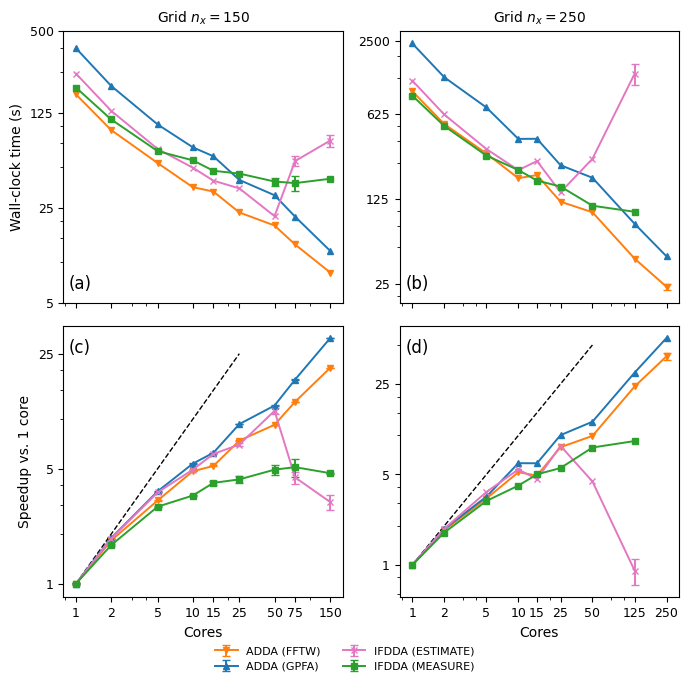

In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FuncFormatter

# ============================================================
# 1. Fichiers d'entrée
# ============================================================
ifdda_file = "logs_MPI_cluster/ifdda_results_sorted.csv"
adda_file  = "logs_MPI_cluster/adda_results_sorted.csv"

# ============================================================
# 2. Paramètres généraux
# ============================================================
Ns = [150, 250]

# Noms des méthodes
method_labels = [
    "ADDA (FFTW)",
    "ADDA (GPFA)",
    "IFDDA (ESTIMATE)",
    "IFDDA (MEASURE)",
]

marker_map = {
    "ADDA (FFTW)"      : "v",
    "ADDA (GPFA)"      : "^",
    "IFDDA (ESTIMATE)"     : "x",
    "IFDDA (MEASURE)"  : "s",
}

color_map  = {
    "ADDA (FFTW)"      : "C1",
    "ADDA (GPFA)"      : "C0",
    "IFDDA (ESTIMATE)"     : "C6",
    "IFDDA (MEASURE)"  : "C2",
}

# ============================================================
# 3. Lecture des fichiers et agrégation des répétitions
# ============================================================

# Dictionnaire : (method_label, N, cores) -> liste de temps (s)
times_dict = {}

def add_sample(method, N, ncores, t):
    key = (method, int(N), int(ncores))
    times_dict.setdefault(key, []).append(float(t))

# ---------- 3.1 IFDDA : OMP = cores ----------
# Colonnes :
# JOBID,N,OMP,EXE,rep,first_residual,last_residual,Cext,
# elapsed_time,num_iterations,num_matvec,total_time,solver_time
idf = pd.read_csv(ifdda_file)

for _, row in idf.iterrows():
    N   = row["N"]
    omp = row["OMP"]
    exe = row["EXE"]
    tsec = row["total_time"]

    if pd.isna(tsec):
        continue

    if exe == "ifdda":
        method = "IFDDA (ESTIMATE)"
    elif exe == "ifdda_measure":
        method = "IFDDA (MEASURE)"
    else:
        continue

    add_sample(method, N, omp, tsec)

# ---------- 3.2 ADDA : NP = cores ----------
# Colonnes :
# JOBID,N,NP,FFT,rep,first_residual,last_residual,Cext,Qext,
# elapsed_time,total_iterations,total_matvec,total_wall_time,solver_time,fft_time
ad = pd.read_csv(adda_file)

for _, row in ad.iterrows():
    N   = row["N"]
    np_cores = row["NP"]
    fft = row["FFT"]
    tsec = row["total_wall_time"]

    if pd.isna(tsec):
        continue

    if fft == "FFTW":
        method = "ADDA (FFTW)"
    elif fft == "GPFA":
        method = "ADDA (GPFA)"
    else:
        continue

    add_sample(method, N, np_cores, tsec)

# ============================================================
# 4. Cœurs disponibles par grille (pour éviter 250 sur n_x=150)
# ============================================================
cores_per_N = {}
for N in Ns:
    cores_N = sorted({k[2] for k in times_dict.keys() if k[1] == N})
    cores_per_N[N] = np.array(cores_N, dtype=int)

print("Cores pour n_x=150 :", cores_per_N[150])
print("Cores pour n_x=250 :", cores_per_N[250])

# ============================================================
# 5. Construction des tableaux moyens + écarts-types
# ============================================================

def build_time_and_speedup_arrays(N, method, cores_all):
    """
    Pour un couple (N, method), renvoie :
      - times_mean : tableau des temps moyens sur cores_all (np.nan si absent)
      - times_std  : tableau des σ (0 si une seule répétition, np.nan si absent)
      - speed_mean : speedup moyen (t1_mean / t) pour chaque cores_all
      - speed_std  : σ des speedups (si plusieurs répétitions)
    """
    times_mean = np.full_like(cores_all, np.nan, dtype=float)
    times_std  = np.full_like(cores_all, np.nan, dtype=float)

    # référence 1 core pour cette méthode et ce N
    key_1 = (method, N, 1)
    t1_samples = np.array(times_dict.get(key_1, []), dtype=float)

    if t1_samples.size == 0 or not np.isfinite(t1_samples).all():
        t1_mean = np.nan
    else:
        t1_mean = t1_samples.mean()

    speed_mean = np.full_like(cores_all, np.nan, dtype=float)
    speed_std  = np.full_like(cores_all, np.nan, dtype=float)

    for i, c in enumerate(cores_all):
        key = (method, N, int(c))
        samples = np.array(times_dict.get(key, []), dtype=float)

        if samples.size == 0:
            continue  # reste NaN

        times_mean[i] = samples.mean()
        times_std[i]  = samples.std(ddof=1) if samples.size > 1 else 0.0

        if np.isfinite(t1_mean) and t1_mean > 0:
            speed_samples = t1_mean / samples
            speed_mean[i] = speed_samples.mean()
            speed_std[i]  = speed_samples.std(ddof=1) if speed_samples.size > 1 else 0.0

    return times_mean, times_std, speed_mean, speed_std

times_mean = {150: {}, 250: {}}
times_std  = {150: {}, 250: {}}
speed_mean = {150: {}, 250: {}}
speed_std  = {150: {}, 250: {}}

for N in Ns:
    cores_N = cores_per_N[N]
    for method in method_labels:
        t_mean, t_std, s_mean, s_std = build_time_and_speedup_arrays(N, method, cores_N)
        times_mean[N][method] = t_mean
        times_std[N][method]  = t_std
        speed_mean[N][method] = s_mean
        speed_std[N][method]  = s_std

# ============================================================
# 6. Style Matplotlib
# ============================================================
plt.rcParams.update({
    "figure.figsize": (7.0, 6.8),
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 1.4,
    "lines.markersize": 5,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

fig, axes = plt.subplots(2, 2, sharex='col', sharey=False)
(ax_time_150, ax_time_250), (ax_speed_150, ax_speed_250) = axes


CV_TIME_MIN = 0.05      # coefficient de variation 5 %
CV_SPEED_MIN = 0.05     # coefficient de variation 5 %


# ============================================================
# 7. (a) Wall time, n_x=150
# ============================================================
N = 150
cores_150 = cores_per_N[N]
for method in method_labels:
    t = times_mean[N][method]
    e = times_std[N][method]
    m = np.isfinite(t)

    if np.any(m):
        cv = e / t
        e_plot = np.where((cv > CV_TIME_MIN) & np.isfinite(cv), e, np.nan)
        ax_time_150.errorbar(
            cores_150[m], t[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ax_time_150.set_ylabel("Wall-clock time (s)")
ax_time_150.set_title(r"Grid $n_x=150$")
ax_time_150.set_xscale('log', base=5)
ax_time_150.set_yscale('log', base=5)
ax_time_150.set_xticks(cores_150)
ax_time_150.set_xticklabels([str(c) for c in cores_150])
ax_time_150.set_yticks([50, 150, 500])
ax_time_150.set_yticks([5, 25, 125, 500])
ax_time_150.set_yticklabels([5, 25, 125, 500])
ax_time_150.text(0.02, 0.05, "(a)", transform=ax_time_150.transAxes, fontsize=12)

# ============================================================
# 8. (b) Wall time, n_x=250
# ============================================================
N = 250
cores_250 = cores_per_N[N]
for method in method_labels:
    t = times_mean[N][method]
    e = times_std[N][method]
    m = np.isfinite(t)

    if np.any(m):
        cv = e / t
        e_plot = np.where((cv > CV_TIME_MIN) & np.isfinite(cv), e, np.nan)
        ax_time_250.errorbar(
            cores_250[m], t[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ax_time_250.set_title(r"Grid $n_x=250$")
ax_time_250.set_xscale('log', base=5)
ax_time_250.set_yscale('log', base=5)
ax_time_250.set_xticks(cores_250)
ax_time_250.set_xticklabels([str(c) for c in cores_250])
ax_time_250.set_ylabel("")
ax_time_250.set_yticks([250, 500, 2500])
ax_time_250.set_yticks([25, 125, 625, 2500])
ax_time_250.set_yticklabels([25, 125, 625, 2500])
ax_time_250.text(0.02, 0.05, "(b)", transform=ax_time_250.transAxes, fontsize=12)

# ============================================================
# 9. (c) Speedup, n_x=150
# ============================================================
N = 150
for method in method_labels:
    s = speed_mean[N][method]
    e = speed_std[N][method]
    m = np.isfinite(s)

    if np.any(m):
        cv = e / s
        e_plot = np.where((cv > CV_SPEED_MIN) & np.isfinite(cv), e, np.nan)

        ax_speed_150.errorbar(
            cores_150[m], s[m],
            yerr=e[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ideal_150 = cores_150 / cores_150[0]
ax_speed_150.plot(
    cores_150[:6], ideal_150[:6],
    linestyle="--",
    linewidth=1.0,
    color="black",
    label="Ideal (linear)"
)

ax_speed_150.set_ylabel("Speedup vs. 1 core")
ax_speed_150.set_xlabel("Cores")
ax_speed_150.set_xscale('log', base=5)
ax_speed_150.set_yscale('log', base=5)
ax_speed_150.set_xticks(cores_150)
ax_speed_150.set_xticklabels([str(c) for c in cores_150])
ax_speed_150.set_yticks([1, 5])
ax_speed_150.set_yticks([1, 5, 25])
ax_speed_150.set_yticklabels([1, 5, 25])
ax_speed_150.text(0.02, 0.90, "(c)", transform=ax_speed_150.transAxes, fontsize=12)

# ============================================================
# 10. (d) Speedup, n_x=250
# ============================================================
N = 250
for method in method_labels:
    s = speed_mean[N][method]
    e = speed_std[N][method]
    m = np.isfinite(s)

    if np.any(m):
        cv = e / s
        e_plot = np.where((cv > CV_SPEED_MIN) & np.isfinite(cv), e, np.nan)

        ax_speed_250.errorbar(
            cores_250[m], s[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ideal_250 = cores_250 / cores_250[0]
ax_speed_250.plot(
    cores_250[:7], ideal_250[:7],
    linestyle="--",
    linewidth=1.0,
    color="black",
    label="Ideal (linear)"
)

ax_speed_250.set_xlabel("Cores")
ax_speed_250.set_xscale('log', base=5)
ax_speed_250.set_yscale('log', base=5)
ax_speed_250.set_xticks(cores_250)
ax_speed_250.set_xticklabels([str(c) for c in cores_250])
ax_speed_250.set_ylabel("")
ax_speed_250.set_yticks([1, 5])
ax_speed_250.set_yticks([1, 5, 25])
ax_speed_250.set_yticklabels([1, 5, 25])
ax_speed_250.text(0.02, 0.90, "(d)", transform=ax_speed_250.transAxes, fontsize=12)

# Enlève les labels x sur la ligne du haut
ax_time_150.set_xlabel("")
ax_time_250.set_xlabel("")

# ============================================================
# 11. Légende commune et sauvegarde
# ============================================================
handles, labels_legend = ax_time_250.get_legend_handles_labels()
fig.legend(handles, labels_legend, loc="lower center",
           ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.01))

fig.tight_layout(rect=(0, 0.03, 1, 1))

#fig.savefig("Figure_IFDDA_ADDA_MPI.pdf", bbox_inches="tight", dpi=300)
# fig.savefig("Figure_IFDDA_ADDA_scaling.svg", bbox_inches="tight", dpi=300)

plt.show()


Cores pour n_x=150 : [  1   2   5  10  15  25  50  75 150]
Cores pour n_x=250 : [  1   2   5  10  15  25  50 125 250]


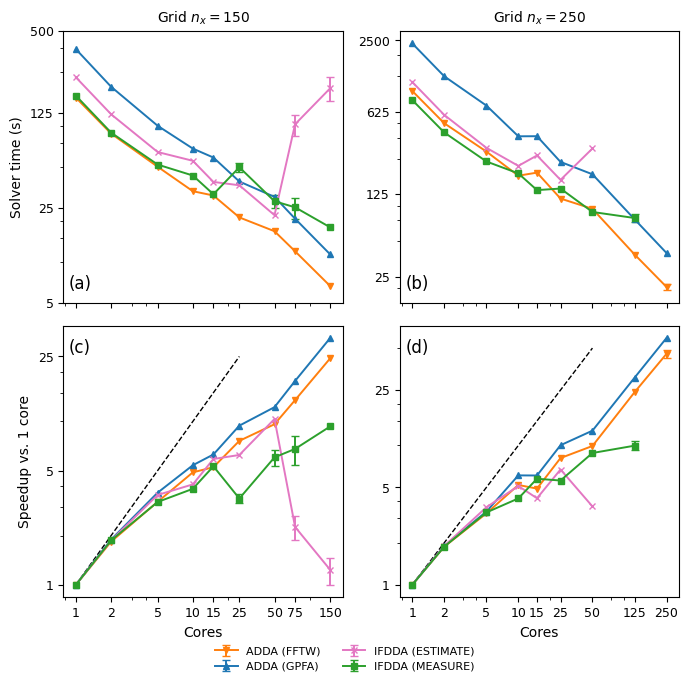

In [93]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FuncFormatter

# ============================================================
# 1. Fichiers d'entrée
# ============================================================
ifdda_file = "logs_MPI_cluster/ifdda_results_sorted.csv"
adda_file  = "logs_MPI_cluster/adda_results_sorted.csv"

# ============================================================
# 2. Paramètres généraux
# ============================================================
Ns = [150, 250]

# Noms des méthodes
method_labels = [
    "ADDA (FFTW)",
    "ADDA (GPFA)",
    "IFDDA (ESTIMATE)",
    "IFDDA (MEASURE)",
]

marker_map = {
    "ADDA (FFTW)"      : "v",
    "ADDA (GPFA)"      : "^",
    "IFDDA (ESTIMATE)"     : "x",
    "IFDDA (MEASURE)"  : "s",
}

color_map  = {
    "ADDA (FFTW)"      : "C1",
    "ADDA (GPFA)"      : "C0",
    "IFDDA (ESTIMATE)"     : "C6",
    "IFDDA (MEASURE)"  : "C2",
}

# ============================================================
# 3. Lecture des fichiers et agrégation des répétitions
# ============================================================

# Dictionnaire : (method_label, N, cores) -> liste de temps (s)
times_dict = {}

def add_sample(method, N, ncores, t):
    key = (method, int(N), int(ncores))
    times_dict.setdefault(key, []).append(float(t))

# ---------- 3.1 IFDDA : OMP = cores ----------
# Colonnes :
# JOBID,N,OMP,EXE,rep,first_residual,last_residual,Cext,
# elapsed_time,num_iterations,num_matvec,total_time,solver_time
idf = pd.read_csv(ifdda_file)

for _, row in idf.iterrows():
    N   = row["N"]
    omp = row["OMP"]
    exe = row["EXE"]
    tsec = row["solver_time"]

    if pd.isna(tsec):
        continue

    if exe == "ifdda":
        method = "IFDDA (ESTIMATE)"
    elif exe == "ifdda_measure":
        method = "IFDDA (MEASURE)"
    else:
        continue

    add_sample(method, N, omp, tsec)

# ---------- 3.2 ADDA : NP = cores ----------
# Colonnes :
# JOBID,N,NP,FFT,rep,first_residual,last_residual,Cext,Qext,
# elapsed_time,total_iterations,total_matvec,total_wall_time,solver_time,fft_time
ad = pd.read_csv(adda_file)

for _, row in ad.iterrows():
    N   = row["N"]
    np_cores = row["NP"]
    fft = row["FFT"]
    tsec = row["solver_time"]

    if pd.isna(tsec):
        continue

    if fft == "FFTW":
        method = "ADDA (FFTW)"
    elif fft == "GPFA":
        method = "ADDA (GPFA)"
    else:
        continue

    add_sample(method, N, np_cores, tsec)

# ============================================================
# 4. Cœurs disponibles par grille (pour éviter 250 sur n_x=150)
# ============================================================
cores_per_N = {}
for N in Ns:
    cores_N = sorted({k[2] for k in times_dict.keys() if k[1] == N})
    cores_per_N[N] = np.array(cores_N, dtype=int)

print("Cores pour n_x=150 :", cores_per_N[150])
print("Cores pour n_x=250 :", cores_per_N[250])

# ============================================================
# 5. Construction des tableaux moyens + écarts-types
# ============================================================

def build_time_and_speedup_arrays(N, method, cores_all):
    """
    Pour un couple (N, method), renvoie :
      - times_mean : tableau des temps moyens sur cores_all (np.nan si absent)
      - times_std  : tableau des σ (0 si une seule répétition, np.nan si absent)
      - speed_mean : speedup moyen (t1_mean / t) pour chaque cores_all
      - speed_std  : σ des speedups (si plusieurs répétitions)
    """
    times_mean = np.full_like(cores_all, np.nan, dtype=float)
    times_std  = np.full_like(cores_all, np.nan, dtype=float)

    # référence 1 core pour cette méthode et ce N
    key_1 = (method, N, 1)
    t1_samples = np.array(times_dict.get(key_1, []), dtype=float)

    if t1_samples.size == 0 or not np.isfinite(t1_samples).all():
        t1_mean = np.nan
    else:
        t1_mean = t1_samples.mean()

    speed_mean = np.full_like(cores_all, np.nan, dtype=float)
    speed_std  = np.full_like(cores_all, np.nan, dtype=float)

    for i, c in enumerate(cores_all):
        key = (method, N, int(c))
        samples = np.array(times_dict.get(key, []), dtype=float)

        if samples.size == 0:
            continue  # reste NaN

        times_mean[i] = samples.mean()
        times_std[i]  = samples.std(ddof=1) if samples.size > 1 else 0.0

        if np.isfinite(t1_mean) and t1_mean > 0:
            speed_samples = t1_mean / samples
            speed_mean[i] = speed_samples.mean()
            speed_std[i]  = speed_samples.std(ddof=1) if speed_samples.size > 1 else 0.0

    return times_mean, times_std, speed_mean, speed_std

times_mean = {150: {}, 250: {}}
times_std  = {150: {}, 250: {}}
speed_mean = {150: {}, 250: {}}
speed_std  = {150: {}, 250: {}}

for N in Ns:
    cores_N = cores_per_N[N]
    for method in method_labels:
        t_mean, t_std, s_mean, s_std = build_time_and_speedup_arrays(N, method, cores_N)
        times_mean[N][method] = t_mean
        times_std[N][method]  = t_std
        speed_mean[N][method] = s_mean
        speed_std[N][method]  = s_std

# ============================================================
# 6. Style Matplotlib
# ============================================================
plt.rcParams.update({
    "figure.figsize": (7.0, 6.8),
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 1.4,
    "lines.markersize": 5,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

CV_TIME_MIN = 0.05      # 5 %
CV_SPEED_MIN = 0.05     # 5 %


fig, axes = plt.subplots(2, 2, sharex='col', sharey=False)
(ax_time_150, ax_time_250), (ax_speed_150, ax_speed_250) = axes

# ============================================================
# 7. (a) Wall time, n_x=150
# ============================================================
N = 150
cores_150 = cores_per_N[N]
for method in method_labels:
    t = times_mean[N][method]
    e = times_std[N][method]
    m = np.isfinite(t)

    if np.any(m):
        cv = e / t
        e_plot = np.where((cv > CV_TIME_MIN) & np.isfinite(cv), e, np.nan)

        ax_time_150.errorbar(
            cores_150[m], t[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ax_time_150.set_ylabel("Solver time (s)")
ax_time_150.set_title(r"Grid $n_x=150$")
ax_time_150.set_xscale('log', base=5)
ax_time_150.set_yscale('log', base=5)
ax_time_150.set_xticks(cores_150)
ax_time_150.set_xticklabels([str(c) for c in cores_150])
ax_time_150.set_yticks([50, 150, 500])
ax_time_150.set_yticks([5, 25, 125, 500])
ax_time_150.set_yticklabels([5, 25, 125, 500])
ax_time_150.text(0.02, 0.05, "(a)", transform=ax_time_150.transAxes, fontsize=12)

# ============================================================
# 8. (b) Wall time, n_x=250
# ============================================================
N = 250
cores_250 = cores_per_N[N]
for method in method_labels:
    t = times_mean[N][method]
    e = times_std[N][method]
    m = np.isfinite(t)

    if np.any(m):
        cv = e / t
        e_plot = np.where((cv > CV_TIME_MIN) & np.isfinite(cv), e, np.nan)

        ax_time_250.errorbar(
            cores_250[m], t[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ax_time_250.set_title(r"Grid $n_x=250$")
ax_time_250.set_xscale('log', base=5)
ax_time_250.set_yscale('log', base=5)
ax_time_250.set_xticks(cores_250)
ax_time_250.set_xticklabels([str(c) for c in cores_250])
ax_time_250.set_ylabel("")
ax_time_250.set_yticks([250, 500, 2500])
ax_time_250.set_yticks([25, 125, 625, 2500])
ax_time_250.set_yticklabels([25, 125, 625, 2500])
ax_time_250.text(0.02, 0.05, "(b)", transform=ax_time_250.transAxes, fontsize=12)

# ============================================================
# 9. (c) Speedup, n_x=150
# ============================================================
N = 150
for method in method_labels:
    s = speed_mean[N][method]
    e = speed_std[N][method]
    m = np.isfinite(s)

    if np.any(m):
        cv = e / s
        e_plot = np.where((cv > CV_SPEED_MIN) & np.isfinite(cv), e, np.nan)

        ax_speed_150.errorbar(
            cores_150[m], s[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ideal_150 = cores_150 / cores_150[0]
ax_speed_150.plot(
    cores_150[:6], ideal_150[:6],
    linestyle="--",
    linewidth=1.0,
    color="black",
    label="Ideal (linear)"
)

ax_speed_150.set_ylabel("Speedup vs. 1 core")
ax_speed_150.set_xlabel("Cores")
ax_speed_150.set_xscale('log', base=5)
ax_speed_150.set_yscale('log', base=5)
ax_speed_150.set_xticks(cores_150)
ax_speed_150.set_xticklabels([str(c) for c in cores_150])
ax_speed_150.set_yticks([1, 5])
ax_speed_150.set_yticks([1, 5, 25])
ax_speed_150.set_yticklabels([1, 5, 25])
ax_speed_150.text(0.02, 0.90, "(c)", transform=ax_speed_150.transAxes, fontsize=12)

# ============================================================
# 10. (d) Speedup, n_x=250
# ============================================================
N = 250
for method in method_labels:
    s = speed_mean[N][method]
    e = speed_std[N][method]
    m = np.isfinite(s)

    if np.any(m):
        cv = e / s
        e_plot = np.where((cv > CV_SPEED_MIN) & np.isfinite(cv), e, np.nan)

        ax_speed_250.errorbar(
            cores_250[m], s[m],
            yerr=e_plot[m],
            marker=marker_map.get(method, "o"),
            color=color_map.get(method, None),
            label=method,
            capsize=3,
            linewidth=1.4,
        )

ideal_250 = cores_250 / cores_250[0]
ax_speed_250.plot(
    cores_250[:7], ideal_250[:7],
    linestyle="--",
    linewidth=1.0,
    color="black",
    label="Ideal (linear)"
)

ax_speed_250.set_xlabel("Cores")
ax_speed_250.set_xscale('log', base=5)
ax_speed_250.set_yscale('log', base=5)
ax_speed_250.set_xticks(cores_250)
ax_speed_250.set_xticklabels([str(c) for c in cores_250])
ax_speed_250.set_ylabel("")
ax_speed_250.set_yticks([1, 5])
ax_speed_250.set_yticks([1, 5, 25])
ax_speed_250.set_yticklabels([1, 5, 25])
ax_speed_250.text(0.02, 0.90, "(d)", transform=ax_speed_250.transAxes, fontsize=12)

# Enlève les labels x sur la ligne du haut
ax_time_150.set_xlabel("")
ax_time_250.set_xlabel("")

# ============================================================
# 11. Légende commune et sauvegarde
# ============================================================
handles, labels_legend = ax_time_250.get_legend_handles_labels()
fig.legend(handles, labels_legend, loc="lower center",
           ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.01))

fig.tight_layout(rect=(0, 0.03, 1, 1))

fig.savefig("Figure_IFDDA_ADDA_solver_time.pdf", bbox_inches="tight", dpi=300)
# fig.savefig("Figure_IFDDA_ADDA_scaling.svg", bbox_inches="tight", dpi=300)

plt.show()


In [106]:
float(np.single(1.7239689999999999))

1.7239689826965332

In [111]:
import pandas as pd

CSV_PATH = "logs_MPI_cluster/adda_results_sorted.csv"
SORTED_CSV_PATH = "logs_MPI_cluster/adda_results_sorted.csv"

df = pd.read_csv(CSV_PATH)

# 1) On enlève toutes les lignes où FFT == "GPFA"
#df = df[df["FFT"] != "GPFA"]
# équivalent :
# df = df.query("FFT != 'GPFA'")

# 2) On trie ce qui reste
df_sorted = df.sort_values(by=["N", "NP", "FFT", "rep"])

# 3) On sauvegarde
df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")


Sorted CSV written to: logs_MPI_cluster/adda_results_sorted.csv


In [119]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import re
from pathlib import Path
import pandas as pd

CSV_PATH = "logs_MPI_cluster/ddscat_results.csv"
OUT_CSV_PATH = "logs_MPI_cluster/ddscat_results_with_elapsed.csv"
SLURM_DIR = Path("logs_MPI_cluster/slurm_logs")

# 1) Read CSV
df = pd.read_csv(CSV_PATH)

# Pattern HH:MM:SS
time_pattern = re.compile(r"(\d{2}):(\d{2}):(\d{2})")

def hms_to_seconds(hms: str) -> float:
    """Convert 'HH:MM:SS' to seconds (float)."""
    if not isinstance(hms, str):
        return float("nan")
    parts = hms.split(":")
    if len(parts) != 3:
        return float("nan")
    try:
        h, m, s = map(int, parts)
        return h * 3600 + m * 60 + s
    except ValueError:
        return float("nan")

for idx, row in df.iterrows():
    jobid = row["JOBID"]
    N    = row["N"]
    fft  = row["FFT"]
    omp  = row["OMP"]
    rep  = row["rep"]

    # Example: mpi_DDSCAT_N150_FFTFFTMKL_omp1_rep3_1532492.out
    log_name = f"mpi_DDSCAT_N{N}_FFT{fft}_omp{omp}_rep{rep}_{jobid}.out"
    log_path = SLURM_DIR / log_name

    if not log_path.exists():
        print(f"[WARN] SLURM log not found: {log_path}")
        continue

    elapsed_hms = None

    with log_path.open("r") as f:
        for line in f:
            if "ddscatcli" not in line:
                continue

            # Toutes les occurrences HH:MM:SS sur la ligne
            matches = time_pattern.findall(line)
            if not matches:
                continue

            # Pour la ligne sacct de ddscatcli :
            # Start, End, Elapsed → 3 temps → on prend le DERNIER (Elapsed)
            h, m, s = matches[-1]
            elapsed_hms = f"{h}:{m}:{s}"
            break  # on a trouvé, on sort

    if elapsed_hms is None:
        print(f"[WARN] No HH:MM:SS time found on ddscatcli line in {log_path}")
        continue

    elapsed_seconds = hms_to_seconds(elapsed_hms)

    df.at[idx, "elapsed_time"] = elapsed_hms
    df.at[idx, "elapsed_seconds"] = elapsed_seconds
    #print(f"[OK] JOBID={jobid}: elapsed_time={elapsed_hms}, elapsed_seconds={elapsed_seconds}")

df.to_csv(OUT_CSV_PATH, index=False)
print(f"Updated CSV written to: {OUT_CSV_PATH}")


Updated CSV written to: logs_MPI_cluster/ddscat_results_with_elapsed.csv


/tmp/ipykernel_222979/748480373.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00:06:26' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "elapsed_time"] = elapsed_hms


In [120]:
import pandas as pd

CSV_PATH = "logs_MPI_cluster/ddscat_results_with_elapsed.csv"
SORTED_CSV_PATH = "logs_MPI_cluster/ddscat_results_sorted.csv"

df = pd.read_csv(CSV_PATH)

# 2) On trie ce qui reste
df_sorted = df.sort_values(by=["N", "OMP", "FFT", "rep"])

# 3) On sauvegarde
df_sorted.to_csv(SORTED_CSV_PATH, index=False)
print(f"Sorted CSV written to: {SORTED_CSV_PATH}")


Sorted CSV written to: logs_MPI_cluster/ddscat_results_sorted.csv
